In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
# Load data
AQ_file_path = 'AirQualityUCI.csv'
df = pd.read_csv(AQ_file_path)

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
df.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1554,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
5,3/10/2004,23:00:00,1.2,1197,38,4.7,750,89,1336,96,1393,949,11.2,59.2,0.7848
6,3/11/2004,0:00:00,1.2,1185,31,3.6,690,62,1462,77,1333,732,11.3,56.8,0.7603
7,3/11/2004,1:00:00,1.0,1136,31,3.3,672,62,1453,76,1333,730,10.7,60.0,0.7702
8,3/11/2004,2:00:00,0.9,1094,24,2.3,608,45,1579,60,1276,620,10.7,59.7,0.7648
9,3/11/2004,3:00:00,0.6,1010,19,1.7,561,-200,1705,-200,1235,501,10.3,60.2,0.7517


In [3]:
#Select Target
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH '],
      dtype='object')

In [4]:
df.shape

(9357, 15)

In [5]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)        int64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)        int64
T                float64
RH               float64
AH               float64
dtype: object

In [6]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.874746,-159.090093,1.865683,894.476969,168.605536,794.871754,58.135834,1391.361975,974.953618,9.776852,39.483873,-6.837604
std,77.657170,329.818519,139.789093,41.380206,342.316710,257.427995,321.977764,126.931715,467.195781,456.926877,43.203377,51.215786,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1052.000000,-200.000000,7.900000,894.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [7]:
df[df == -200] = np.nan
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

df.head(100)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,3/10/2004,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1336.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,3/11/2004,0:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,732.0,11.3,56.8,0.7603
7,3/11/2004,1:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,3/11/2004,2:00:00,0.9,1094.0,24.0,2.3,608.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,3/11/2004,3:00:00,0.6,1010.0,19.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517


In [8]:
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [9]:
columns_to_fill = df.columns[2:15]
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean().astype(int))

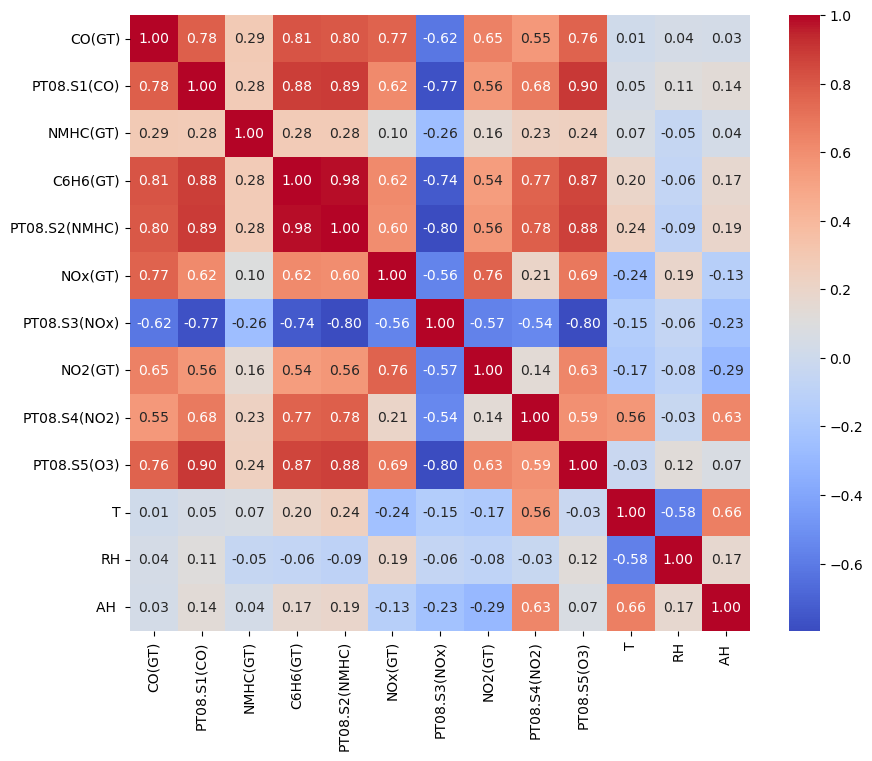

In [10]:
numeric_features = df.select_dtypes(exclude=['object']).columns
matrix=df[numeric_features].corr()

matrix.RH[abs(matrix['RH'])>0.05].index
plt.figure(figsize=(10, 8))

sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [11]:
df.drop(['Date', 'Time'], axis=1, inplace=True)
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


Percentile 25 (Q1): This is the value below which 25% of the data falls. It is the first quartile.

Percentile 75 (Q3): This is the value below which 75% of the data falls. It is the third quartile.

Interquartile Range (IQR): This is the range between the first quartile (Q1) and the third quartile (Q3). Mathematically, it is calculated as 
IQR=Q3−Q1. The IQR represents the middle 50% of the data.

Upper Limit: It is calculated as 

Upper Limit=Q3+1.5×IQR.

Any data point above this limit is considered a potential outlier.

Lower Limit: It is calculated as 

Lower Limit=Q1−1.5×IQR.

Any data point below this limit is considered a potential outlier.

In [12]:
percentile25=df['CO(GT)'].quantile(0.25)
percentile75=df['CO(GT)'].quantile(0.75)

In [13]:
iqr=percentile75-percentile25
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

In [14]:
lower_limit 

-0.9000000000000001

In [15]:
upper_limit

4.7

In [16]:
filtered_subset = df.loc[df["CO(GT)"] < lower_limit].copy()
filtered_subset.loc[:, 'CO(GT)'] = lower_limit
df.loc[filtered_subset.index] = filtered_subset

In [17]:
filtered_subset = df.loc[df["CO(GT)"] > upper_limit].copy()
filtered_subset.loc[:, 'CO(GT)'] = upper_limit
df.loc[filtered_subset.index] = filtered_subset

<Axes: >

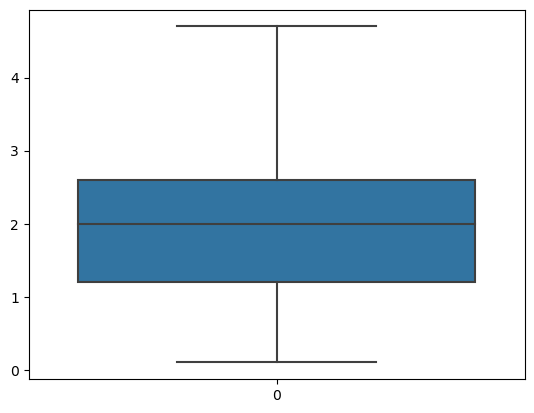

In [18]:
sns.boxplot(df['CO(GT)'])

In [19]:
df.shape

(9357, 13)

In [20]:
for i in range(1,13):
    percentile25=df[df.columns[i]].quantile(0.25)
    percentile75=df[df.columns[i]].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+1.5*iqr
    lower_limit=percentile25-1.5*iqr
    
    filtered_subset = df.loc[df[df.columns[i]] < lower_limit].copy()
    filtered_subset.loc[:, df.columns[i]] = lower_limit
    df.loc[filtered_subset.index] = filtered_subset

    filtered_subset = df.loc[df[df.columns[i]] > upper_limit].copy()
    filtered_subset.loc[:, df.columns[i]] = upper_limit
    df.loc[filtered_subset.index] = filtered_subset

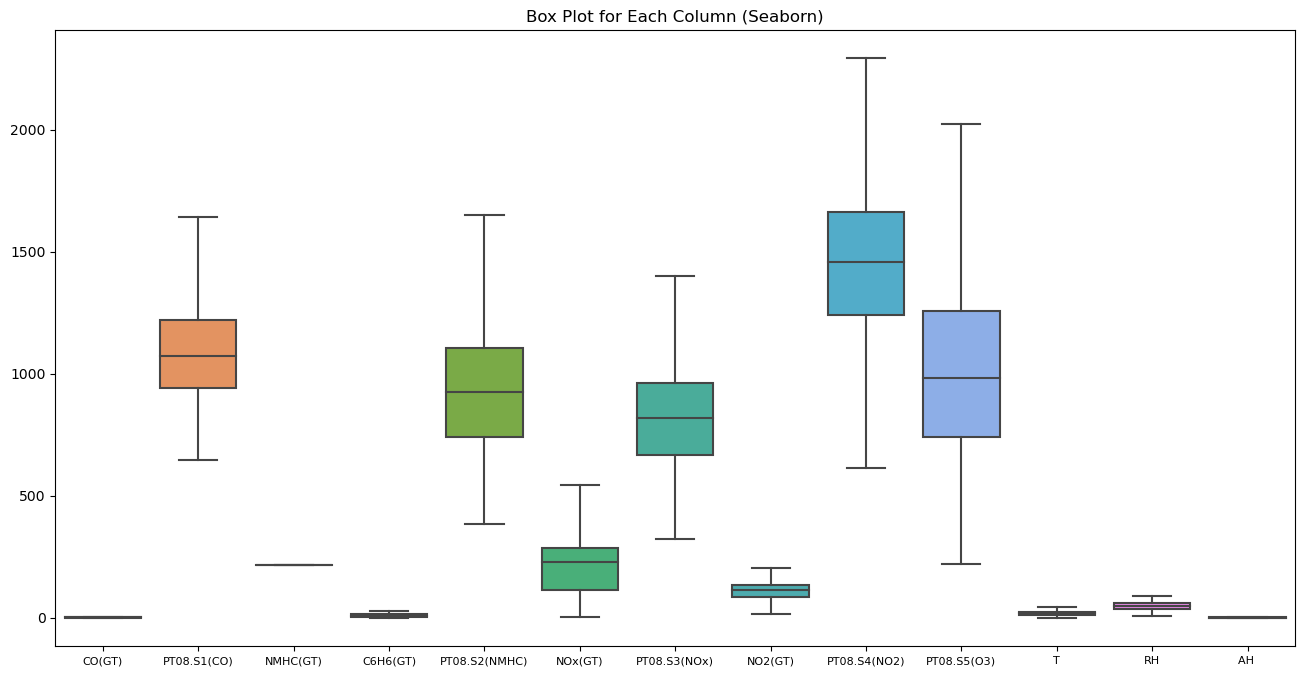

In [21]:
# Set a larger figure size
plt.figure(figsize=(16, 8))

# Create a box plot for each column using Seaborn
sns.boxplot(data=df)

# Set x-axis label font size for better visibility
plt.xticks(fontsize=8)

plt.title('Box Plot for Each Column (Seaborn)')
plt.show()

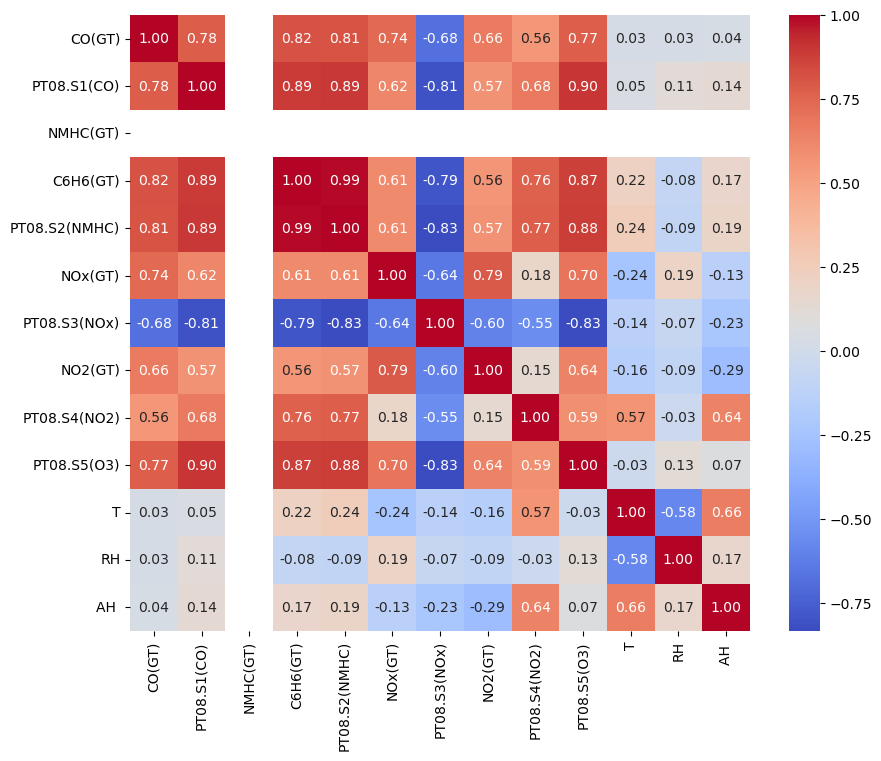

In [22]:
numeric_features = df.columns
matrix=df[numeric_features].corr()

matrix.RH[abs(matrix['RH'])>0.05].index
plt.figure(figsize=(10, 8))

sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [23]:
df=df.drop(['CO(GT)', 'C6H6(GT)', 'NMHC(GT)', 'PT08.S3(NOx)', 'PT08.S4(NO2)'], axis=1)

In [24]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
Y=df['RH']
X=df.drop(columns='RH')

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)
print(X_train.shape)
print(X_test.shape)

(7953, 7)
(1404, 7)


In [25]:
def cost(y_hat, y):
    l = (y_hat - y) ** 2
    cost = l.mean()
    return cost

In [26]:
Parameter = np.zeros(X_train.shape[1])

def gradient_descent(X_train, y_train, Parameter, learning_rate, num_epochs):
    L=[]
    for i in range(num_epochs):
        y_hat = np.dot(X_train, Parameter)
        errors = y_hat - y_train
        gradient = np.dot(X_train.T, errors) / len(y_train)
        Parameter -= learning_rate * gradient
        L.append(cost(y_hat, y_train))

    return Parameter,L


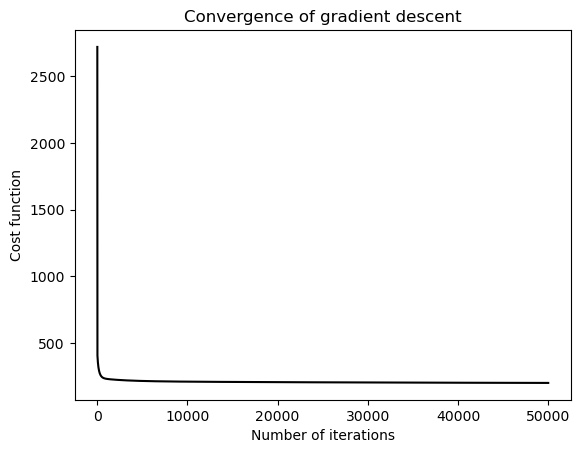

In [27]:
# Hyperparameters
learning_rate = 0.0000003
num_epochs = 50000

#Calling Gradient descent
Parameter,L = gradient_descent(X_train, y_train, Parameter, learning_rate, num_epochs)

#Plotting Cost v/s Iterations
plt.plot(range(1, num_epochs + 1), L, color='k')
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.title('Convergence of gradient descent')
plt.show()



In [28]:
y_hat_lin= np.dot(X_test, Parameter)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Mean Squared Error for Relative Humidity: 201.99998412554763
R2 Score for Relative Humidity: 0.3036461548802546


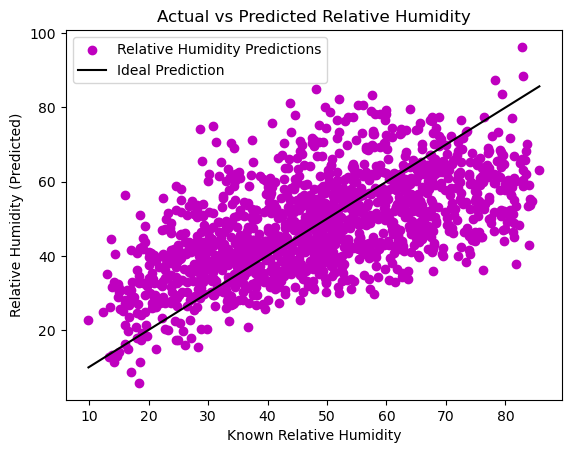

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

def evaluate_and_plot(y_true, y_pred, variable_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Mean Squared Error for {variable_name}: {mse}")
    print(f"R2 Score for {variable_name}: {r2}")
    
    # Scatter plot of actual vs predicted values
    plt.scatter(y_true, y_pred, color='m', label=f"{variable_name} Predictions")
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='k', label='Ideal Prediction')
    
    plt.xlabel(f"Known {variable_name}")
    plt.ylabel(f"{variable_name} (Predicted)")
    plt.title(f"Actual vs Predicted {variable_name}")
    plt.legend()
    plt.show()

# Example usage for Relative Humidity
evaluate_and_plot(y_test, y_hat_lin, "Relative Humidity")



Mean Squared Error for Relative Humidity: 38.65006497960152
R2 Score for Relative Humidity: 0.8667617649615963


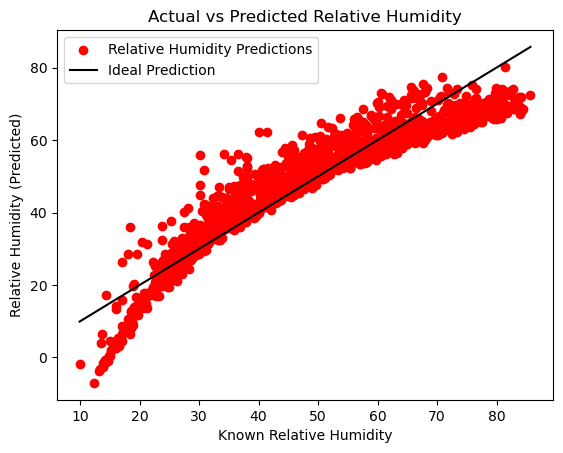

In [31]:

def evaluate_and_plot(y_true, y_pred, variable_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Mean Squared Error for {variable_name}: {mse}")
    print(f"R2 Score for {variable_name}: {r2}")

    plot_actual_vs_predicted(y_true, y_pred, variable_name)

def plot_actual_vs_predicted(y_true, y_pred, variable_name):
    plt.scatter(y_true, y_pred, color='r', label=f"{variable_name} Predictions")
    plt.title(f"Actual vs Predicted {variable_name}")
    plt.xlabel(f"Known {variable_name}")
    plt.ylabel(f"{variable_name} (Predicted)")

    # Assuming a line of perfect prediction (actual = predicted)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='k', label='Ideal Prediction')

    plt.legend()
    plt.show()

# Example usage for Relative Humidity
evaluate_and_plot(y_test, y_pred, "Relative Humidity")



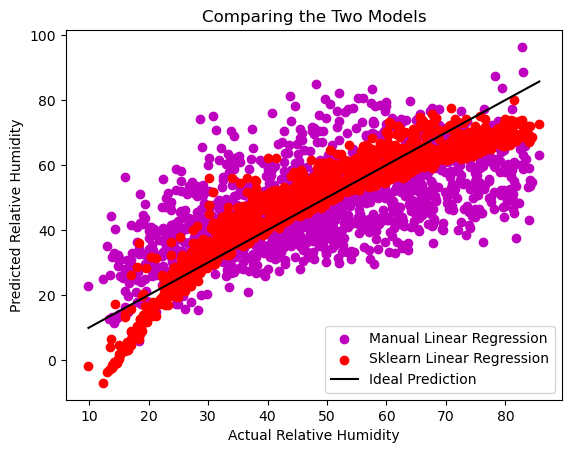

In [32]:
plt.scatter(y_test, y_hat_lin, color='m', label='Manual Linear Regression')
plt.scatter(y_test, y_pred, color='r', label='Sklearn Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='k', label='Ideal Prediction')

plt.xlabel("Actual Relative Humidity")
plt.ylabel("Predicted Relative Humidity")
plt.title("Comparing the Two Models")
plt.legend()
plt.show()
